In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


## Data Preprocessing

In [56]:
# Hyperparameters

# y column normalize scaler
normalizer_constant = 1

# NN parameters
learning_rate = 0.1
num_epoch = 500
NN_layer_dimension = [100,100]

In [63]:
SNP = pd.read_csv('./SP500.csv')

# get columns 2-6 (X)
SNP_attribute = SNP.iloc[:,1:6]
# get last column (y)
SNP_price = SNP.iloc[:,-1:]

# normalize the data using MinMax scaller
scaler = MinMaxScaler()
scaler.fit(SNP_attribute)
SNP_attribute = scaler.transform(SNP_attribute)

SNP_price = (SNP_price-SNP_price.min())/((SNP_price.max()*normalizer_constant)-SNP_price.min())

X_train, X_test, y_train, y_test = train_test_split(SNP_attribute, SNP_price, train_size=716, shuffle=True)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

(716, 5, 1)

In [61]:
# NN 
def create_model(units=[12,3], learning_rate=0.3):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(5,)))
    model.add(tf.keras.layers.Dense(units[0], activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(units[1], activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

    # # LSTM RNN model
    # model.add(LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=96,return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=96,return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=96))
    # model.add(Dropout(0.2))
    # model.add(Dense(units=1))


    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=[['accuracy', 'mse']])

    return model

model = create_model(units=NN_layer_dimension, learning_rate=learning_rate)
model.fit(X_train, y_train, epochs=500, batch_size=25, verbose=1)



Epoch 1/500
29/29 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.0014 - mse: 0.0717
Epoch 2/500
29/29 [==============================] - 0s 941us/step - loss: 0.0670 - accuracy: 0.0014 - mse: 0.0670
Epoch 3/500
29/29 [==============================] - 0s 915us/step - loss: 0.0670 - accuracy: 0.0014 - mse: 0.0670
Epoch 4/500
29/29 [==============================] - 0s 958us/step - loss: 0.0670 - accuracy: 0.0014 - mse: 0.0670
Epoch 5/500
29/29 [==============================] - 0s 944us/step - loss: 0.0670 - accuracy: 0.0014 - mse: 0.0670
Epoch 6/500
29/29 [==============================] - 0s 937us/step - loss: 0.0670 - accuracy: 0.0014 - mse: 0.0670
Epoch 7/500
29/29 [==============================] - 0s 959us/step - loss: 0.0670 - accuracy: 0.0014 - mse: 0.0670
Epoch 8/500
29/29 [==============================] - 0s 991us/step - loss: 0.0670 - accuracy: 0.0014 - mse: 0.0670
Epoch 9/500
29/29 [==============================] - 0s 950us/step - loss: 0.0670 

Text(0.5, 0, 'date')

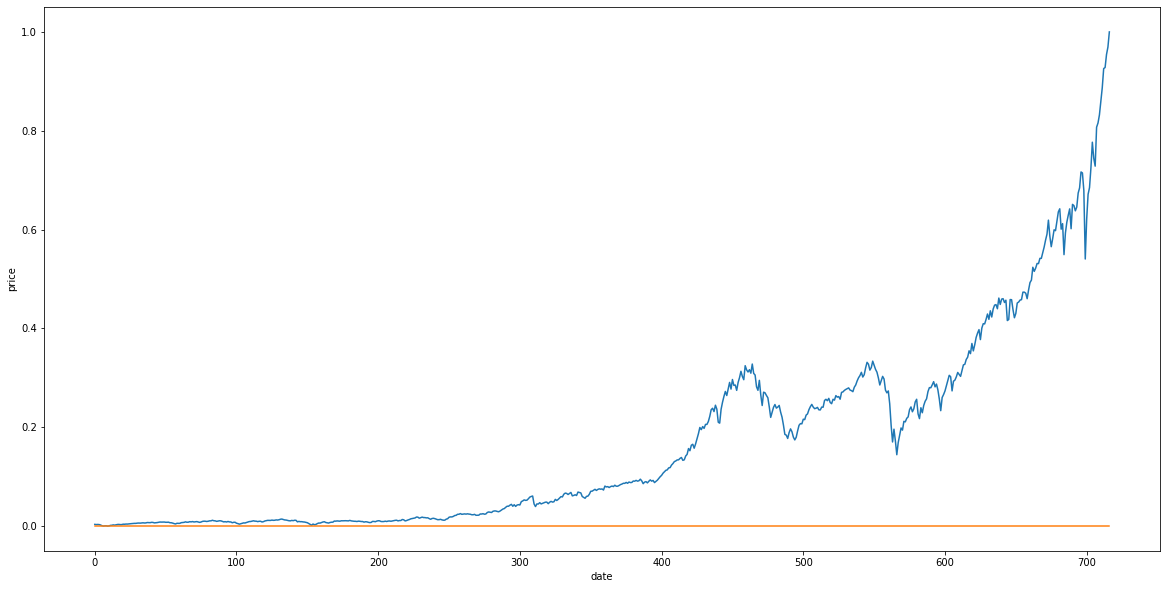

In [62]:
predicted_price = model.predict(SNP_attribute)

plt.figure(figsize=(20,10))

plt.plot(SNP_price)
plt.plot(predicted_price)
plt.ylabel('price')
plt.xlabel('date')